In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler

# Exploratory Data Analysis

In [2]:
data = pd.read_csv("loan_data_2007_2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Menampilkan semua kolom dan baris
pd.set_option("display.max_columns", None)

# Menampilkan DataFrame
data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [4]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(466285, 75)

In [6]:
kolom_to_drop = ['Unnamed: 0']
data = data.drop(kolom_to_drop, axis=1)

In [7]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd

# 1. Apakah format data sudah teragregasi atau data masih raw?
print("1. Format Data: Data masih dalam format raw atau mentah.")

# 2. Satu baris data mewakili apa?
print("2. Satu Baris Data Mewakili: Satu baris data mewakili profil seorang peminjam atau pengguna layanan pinjaman.")

# 3. Apakah ada satu individu sama yang menempati lebih dari satu baris (duplicate)?
is_duplicate = data.duplicated(subset=['id']).any()
print(f"3. Duplikasi Data: {is_duplicate}")

# 4. Kolom-kolom apa saja yang tersedia?
print("4. Kolom-Kolom yang Tersedia:")
print(data.columns)

# 5. Apakah data yang tersedia cukup untuk membuat pemodelan credit risk?
print("Data ini memiliki banyak informasi yang relevan untuk pemodelan risiko kredit, seperti jumlah pinjaman, tingkat suku bunga, pendapatan tahunan, status pekerjaan, dan lain-lain. Namun, untuk membuat pemodelan risiko kredit yang baik, Anda mungkin perlu melakukan pra-pemrosesan data, seperti mengatasi missing values, mengidentifikasi dan mengatasi outlier, serta memilih fitur-fitur yang paling relevan. Selain itu, Anda juga perlu melakukan analisis lebih lanjut terkait dengan distribusi variabel dan korelasi antar variabel sebelum membangun model.")

1. Format Data: Data masih dalam format raw atau mentah.
2. Satu Baris Data Mewakili: Satu baris data mewakili profil seorang peminjam atau pengguna layanan pinjaman.
3. Duplikasi Data: False
4. Kolom-Kolom yang Tersedia:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',

In [9]:
# Dapatkan daftar jenis semua kolom di dataset
data.dtypes

id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [11]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [12]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [13]:
# Melihat nilai unik dalam setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Kolom '{column}': {unique_values}")

Kolom 'id': [1077501 1077430 1077175 ... 9584776 9604874 9199665]
Kolom 'member_id': [ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
Kolom 'loan_amnt': [ 5000  2500  2400 ... 33675 27775 33175]
Kolom 'funded_amnt': [ 5000  2500  2400 ... 27775 33175 31725]
Kolom 'funded_amnt_inv': [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Kolom 'term': [' 36 months' ' 60 months']
Kolom 'int_rate': [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.

Kolom 'initial_list_status': ['f' 'w']
Kolom 'out_prncp': [    0.     766.9   1889.15 ... 12574.   14428.31  3984.38]
Kolom 'out_prncp_inv': [    0.     766.9   1889.15 ... 12574.   14428.31  3974.41]
Kolom 'total_pymnt': [ 5861.071414  1008.71      3003.653644 ... 12343.98      2126.579838
  8821.62    ]
Kolom 'total_pymnt_inv': [ 5831.78  1008.71  3003.65 ... 12343.98  2126.58  8799.57]
Kolom 'total_rec_prncp': [5000.    456.46 2400.   ... 5826.   1837.04 6015.62]
Kolom 'total_rec_int': [ 861.07  435.17  603.65 ... 5338.68 4557.36 6072.29]
Kolom 'total_rec_late_fee': [ 0.   16.97 15.   ... 35.67 37.43 41.15]
Kolom 'recoveries': [   0.    117.08  189.06 ... 1519.    682.95 1159.4 ]
Kolom 'collection_recovery_fee': [ 0.      1.11    2.09   ... 44.7043  6.8295 11.594 ]
Kolom 'last_pymnt_d': ['Jan-15' 'Apr-13' 'Jun-14' 'Jan-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Au

# Defining Label

In [14]:
column = 'loan_status'
unique_values = data[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values.index.tolist())

Kolom 'loan_status':
['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']


In [15]:
# Mengubah nilai 'Fully Paid' dan 'Current' menjadi 1, yang lainnya menjadi 0
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x in ['Fully Paid', 'Current'] else 0)

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [17]:
# Melihat nilai unik dalam setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Kolom '{column}': {unique_values}")

Kolom 'id': [1077501 1077430 1077175 ... 9584776 9604874 9199665]
Kolom 'member_id': [ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
Kolom 'loan_amnt': [ 5000  2500  2400 ... 33675 27775 33175]
Kolom 'funded_amnt': [ 5000  2500  2400 ... 27775 33175 31725]
Kolom 'funded_amnt_inv': [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Kolom 'term': [' 36 months' ' 60 months']
Kolom 'int_rate': [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.

Kolom 'out_prncp_inv': [    0.     766.9   1889.15 ... 12574.   14428.31  3974.41]
Kolom 'total_pymnt': [ 5861.071414  1008.71      3003.653644 ... 12343.98      2126.579838
  8821.62    ]
Kolom 'total_pymnt_inv': [ 5831.78  1008.71  3003.65 ... 12343.98  2126.58  8799.57]
Kolom 'total_rec_prncp': [5000.    456.46 2400.   ... 5826.   1837.04 6015.62]
Kolom 'total_rec_int': [ 861.07  435.17  603.65 ... 5338.68 4557.36 6072.29]
Kolom 'total_rec_late_fee': [ 0.   16.97 15.   ... 35.67 37.43 41.15]
Kolom 'recoveries': [   0.    117.08  189.06 ... 1519.    682.95 1159.4 ]
Kolom 'collection_recovery_fee': [ 0.      1.11    2.09   ... 44.7043  6.8295 11.594 ]
Kolom 'last_pymnt_d': ['Jan-15' 'Apr-13' 'Jun-14' 'Jan-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Apr-15' 'Feb-14' 'Sep-14' 'Jun-12' 'Feb-13'
 'Mar-13' 'May-14' 'Mar-15' 'J

In [18]:
# Menampilkan nilai unik dari setiap kolom
print("Nilai unik dari kolom 'issue_d':")
print(data['issue_d'].unique())

print("\nNilai unik dari kolom 'earliest_cr_line':")
print(data['earliest_cr_line'].unique())

print("\nNilai unik dari kolom 'last_pymnt_d':")
print(data['last_pymnt_d'].unique())

print("\nNilai unik dari kolom 'next_pymnt_d':")
print(data['next_pymnt_d'].unique())

print("\nNilai unik dari kolom 'last_credit_pull_d':")
print(data['last_credit_pull_d'].unique())

Nilai unik dari kolom 'issue_d':
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-13' 'Sep-13' 'Aug-13' 'Jul-13' 'Jun-13' 'May-13' 'Apr-13'
 'Mar-13' 'Feb-13' 'Jan-13' 'Dec-12' 'Nov-12' 'Oct-12' 'Sep-12' 'Aug-12'
 'Jul-12' 'Jun-12' 'May-12' 'Apr-12' 'Mar-12' 'Feb-12' 'Jan-12' 'Dec-14'
 'Nov-14' 'Oct-14' 'Sep-14' 'Aug-14' 'Jul-14' 'Jun-14' 'May-14' 'Apr-14'
 'Mar-14' 'Feb-14' 'Jan-14']

Nilai unik dari kolom 'earliest_cr_line':
['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 

In [19]:
# Mengubah format kolom 'issue_d'
data['issue_d'] = data['issue_d'].str[-2:]

# Mengubah format kolom 'earliest_cr_line'
data['earliest_cr_line'] = data['earliest_cr_line'].str[-2:]

# Mengubah format kolom 'last_pymnt_d'
data['last_pymnt_d'] = data['last_pymnt_d'].str[-2:]

# Mengubah format kolom 'next_pymnt_d'
data['next_pymnt_d'] = data['next_pymnt_d'].str[-2:]

# Mengubah format kolom 'last_credit_pull_d'
data['last_credit_pull_d'] = data['last_credit_pull_d'].str[-2:]

In [20]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15,171.62,NaN,16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11,0,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13,119.66,NaN,13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14,649.91,NaN,16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15,357.48,NaN,15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16,67.79,16,16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Contoh: Menghitung rata-rata 'loan_amnt' berdasarkan 'purpose'
average_loan_by_purpose = data.groupby('purpose')['loan_amnt'].mean()

# Contoh: Menghitung jumlah total 'annual_inc' berdasarkan 'home_ownership'
total_annual_income_by_ownership = data.groupby('home_ownership')['annual_inc'].sum()

# Contoh: Menghitung median 'dti' berdasarkan 'grade'
median_dti_by_grade = data.groupby('grade')['dti'].median()

mean_annual_inc_by_grade = data.groupby('grade')['annual_inc'].mean()

# Menampilkan hasil agregasi
print("Rata-rata loan_amnt berdasarkan purpose:")
print(average_loan_by_purpose)

print("\nTotal annual_inc berdasarkan home_ownership:")
print(total_annual_income_by_ownership)

print("\nMedian dti berdasarkan grade:")
print(median_dti_by_grade)

print("\nMean annual_inc berdasarkan grade:")
print(mean_annual_inc_by_grade)

Rata-rata loan_amnt berdasarkan purpose:
purpose
car                    8122.063183
credit_card           14738.591981
debt_consolidation    15129.763307
educational            6626.540284
home_improvement      13911.130685
house                 14959.960335
major_purchase        10494.243488
medical                8851.222295
moving                 7550.033400
other                  9519.835374
renewable_energy      10027.350427
small_business        15313.763725
vacation               6077.100925
wedding               10471.436193
Name: loan_amnt, dtype: float64

Total annual_inc berdasarkan home_ownership:
home_ownership
ANY         3.568000e+04
MORTGAGE    1.968032e+10
NONE        2.931851e+06
OTHER       1.213340e+07
OWN         2.742560e+09
RENT        1.172987e+10
Name: annual_inc, dtype: float64

Median dti berdasarkan grade:
grade
A    14.41
B    16.32
C    17.51
D    18.21
E    18.71
F    18.49
G    18.63
Name: dti, dtype: float64

Mean annual_inc berdasarkan grade:
grade
A  

In [22]:
# Agregasi rata-rata loan_amnt berdasarkan purpose
average_loan_by_purpose = data.groupby('purpose')['loan_amnt'].mean().reset_index()
average_loan_by_purpose.columns = ['purpose', 'avg_loan_amnt']

# Agregasi total annual_inc berdasarkan home_ownership
total_annual_income_by_ownership = data.groupby('home_ownership')['annual_inc'].sum().reset_index()
total_annual_income_by_ownership.columns = ['home_ownership', 'total_annual_inc']

# Agregasi median dti berdasarkan grade
median_dti_by_grade = data.groupby('grade')['dti'].median().reset_index()
median_dti_by_grade.columns = ['grade', 'median_dti']

# Agregasi mean annual_inc berdasarkan grade
mean_annual_inc_by_grade = data.groupby('grade')['annual_inc'].mean().reset_index()
mean_annual_inc_by_grade.columns = ['grade', 'mean_annual_inc']

# Gabungkan hasil agregasi dengan data asli
data = data.merge(average_loan_by_purpose, on='purpose', how='left')
data = data.merge(total_annual_income_by_ownership, on='home_ownership', how='left')
data = data.merge(median_dti_by_grade, on='grade', how='left')
data = data.merge(mean_annual_inc_by_grade, on='grade', how='left')

In [23]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,avg_loan_amnt,total_annual_inc,median_dti,mean_annual_inc
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15,171.62,NaN,16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14738.591981,1.172987e+10,16.32,72304.457095
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11,0,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13,119.66,NaN,13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8122.063183,1.172987e+10,17.51,70322.501511
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14,649.91,NaN,16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15313.763725,1.172987e+10,17.51,70322.501511
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15,357.48,NaN,15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9519.835374,1.172987e+10,17.51,70322.501511
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11,1,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16,67.79,16,16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9519.835374,1.172987e+10,16.32,72304.457095


# Feature Selection

In [24]:
columns_to_drop = [
    'id', 'member_id', 'url', 'desc',
    'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'emp_title', 'title', 'zip_code',
    'pymnt_plan', 'policy_code',
    'application_type', 'initial_list_status', 'term', 'open_acc_6m',
    'open_il_6m', 'open_il_12m', 'open_il_24m',	'mths_since_rcnt_il', 'total_bal_il',
    'il_util',	'open_rv_12m', 'open_rv_24m', 'max_bal_bc',	'all_util', 'inq_fi', 'total_cu_tl',
    'inq_last_12m', 'next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]

data = data.drop(columns=columns_to_drop)

In [25]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,avg_loan_amnt,total_annual_inc,median_dti,mean_annual_inc
0,5000,5000,4975.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,11,1,credit_card,AZ,27.65,0.0,85,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15,171.62,16,0.0,0.0,14738.591981,1.172987e+10,16.32,72304.457095
1,2500,2500,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,11,0,car,GA,1.00,0.0,99,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13,119.66,13,0.0,0.0,8122.063183,1.172987e+10,17.51,70322.501511
2,2400,2400,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,11,1,small_business,IL,8.72,0.0,01,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14,649.91,16,0.0,0.0,15313.763725,1.172987e+10,17.51,70322.501511
3,10000,10000,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11,1,other,CA,20.00,0.0,96,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15,357.48,15,0.0,0.0,9519.835374,1.172987e+10,17.51,70322.501511
4,3000,3000,3000.0,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11,1,other,OR,17.94,0.0,96,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16,67.79,16,0.0,0.0,9519.835374,1.172987e+10,16.32,72304.457095


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   int_rate                    466285 non-null  float64
 4   installment                 466285 non-null  float64
 5   grade                       466285 non-null  object 
 6   sub_grade                   466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  issue_d                     466285 non-null  object 
 12  loan_status                 466285 non-null  int64  
 13  purpose       

In [27]:
# Melihat nilai unik dalam setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Kolom '{column}': {unique_values}")

Kolom 'loan_amnt': [ 5000  2500  2400 ... 33675 27775 33175]
Kolom 'funded_amnt': [ 5000  2500  2400 ... 27775 33175 31725]
Kolom 'funded_amnt_inv': [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Kolom 'int_rate': [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12

# Handling Missing Values

In [28]:
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv             

In [29]:
data = data.dropna()

In [30]:
# Melihat nilai unik dalam setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Kolom '{column}': {unique_values}")

Kolom 'loan_amnt': [ 5000  2500  2400 ... 27775 33175 27925]
Kolom 'funded_amnt': [ 5000  2500  2400 ... 33175 31725 27925]
Kolom 'funded_amnt_inv': [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Kolom 'int_rate': [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 16.77  7.51  8.9  18.25  6.62 19.91 17.27 14.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49 15.99 16.49  6.99 12.99
 15.23 14.79  5.42  8.49 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 16.59 17.19
 12.87 20.69  9.67 21.82 19.79 18.49 13.84 22.94 24.59 24.4  21.48 14.82
  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14 11.11
 10.37 14.17 16.4   7.66 10.   10.74  5.79  6.92  9.63 14.54 12.68 18.62
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444451 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   444451 non-null  int64  
 1   funded_amnt                 444451 non-null  int64  
 2   funded_amnt_inv             444451 non-null  float64
 3   int_rate                    444451 non-null  float64
 4   installment                 444451 non-null  float64
 5   grade                       444451 non-null  object 
 6   sub_grade                   444451 non-null  object 
 7   emp_length                  444451 non-null  object 
 8   home_ownership              444451 non-null  object 
 9   annual_inc                  444451 non-null  float64
 10  verification_status         444451 non-null  object 
 11  issue_d                     444451 non-null  object 
 12  loan_status                 444451 non-null  int64  
 13  purpose       

# Feature Scaling dan Encoding

In [32]:
data['issue_d'] = pd.to_numeric(data['issue_d'])
data['earliest_cr_line'] = pd.to_numeric(data['earliest_cr_line'])
data['last_pymnt_d'] = pd.to_numeric(data['last_pymnt_d'])
data['last_credit_pull_d'] = pd.to_numeric(data['last_credit_pull_d'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444451 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   444451 non-null  int64  
 1   funded_amnt                 444451 non-null  int64  
 2   funded_amnt_inv             444451 non-null  float64
 3   int_rate                    444451 non-null  float64
 4   installment                 444451 non-null  float64
 5   grade                       444451 non-null  object 
 6   sub_grade                   444451 non-null  object 
 7   emp_length                  444451 non-null  object 
 8   home_ownership              444451 non-null  object 
 9   annual_inc                  444451 non-null  float64
 10  verification_status         444451 non-null  object 
 11  issue_d                     444451 non-null  int64  
 12  loan_status                 444451 non-null  int64  
 13  purpose       

In [34]:
# Melihat nilai unik dalam setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Kolom '{column}': {unique_values}")

Kolom 'loan_amnt': [ 5000  2500  2400 ... 27775 33175 27925]
Kolom 'funded_amnt': [ 5000  2500  2400 ... 33175 31725 27925]
Kolom 'funded_amnt_inv': [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Kolom 'int_rate': [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 16.77  7.51  8.9  18.25  6.62 19.91 17.27 14.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49 15.99 16.49  6.99 12.99
 15.23 14.79  5.42  8.49 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 16.59 17.19
 12.87 20.69  9.67 21.82 19.79 18.49 13.84 22.94 24.59 24.4  21.48 14.82
  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14 11.11
 10.37 14.17 16.4   7.66 10.   10.74  5.79  6.92  9.63 14.54 12.68 18.62
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12

In [35]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,avg_loan_amnt,total_annual_inc,median_dti,mean_annual_inc
0,5000,5000,4975.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,11,1,credit_card,AZ,27.65,0.0,85,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15,171.62,16,0.0,0.0,14738.591981,1.172987e+10,16.32,72304.457095
1,2500,2500,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,11,0,car,GA,1.00,0.0,99,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13,119.66,13,0.0,0.0,8122.063183,1.172987e+10,17.51,70322.501511
2,2400,2400,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,11,1,small_business,IL,8.72,0.0,1,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14,649.91,16,0.0,0.0,15313.763725,1.172987e+10,17.51,70322.501511
3,10000,10000,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11,1,other,CA,20.00,0.0,96,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15,357.48,15,0.0,0.0,9519.835374,1.172987e+10,17.51,70322.501511
4,3000,3000,3000.0,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11,1,other,OR,17.94,0.0,96,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16,67.79,16,0.0,0.0,9519.835374,1.172987e+10,16.32,72304.457095


In [36]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'avg_loan_amnt',
       'total_annual_inc', 'median_dti', 'mean_annual_inc'],
      dtype='object')

In [37]:
# Kolom yang akan di-encode
columns_to_encode = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 
                     'verification_status', 'purpose', 'addr_state']

# Inisialisasi dan fitting OrdinalEncoder
encoder = OrdinalEncoder()
data[columns_to_encode] = encoder.fit_transform(data[columns_to_encode])

In [38]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,avg_loan_amnt,total_annual_inc,median_dti,mean_annual_inc
0,5000,5000,4975.0,10.65,162.87,1.0,6.0,1.0,5.0,24000.0,2.0,11,1,1.0,3.0,27.65,0.0,85,1.0,3.0,0.0,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15,171.62,16,0.0,0.0,14738.591981,1.172987e+10,16.32,72304.457095
1,2500,2500,2500.0,15.27,59.83,2.0,13.0,10.0,5.0,30000.0,1.0,11,0,0.0,10.0,1.00,0.0,99,5.0,3.0,0.0,1687,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13,119.66,13,0.0,0.0,8122.063183,1.172987e+10,17.51,70322.501511
2,2400,2400,2400.0,15.96,84.33,2.0,14.0,1.0,5.0,12252.0,0.0,11,1,11.0,14.0,8.72,0.0,1,2.0,2.0,0.0,2956,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14,649.91,16,0.0,0.0,15313.763725,1.172987e+10,17.51,70322.501511
3,10000,10000,10000.0,13.49,339.31,2.0,10.0,1.0,5.0,49200.0,1.0,11,1,9.0,4.0,20.00,0.0,96,1.0,10.0,0.0,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15,357.48,15,0.0,0.0,9519.835374,1.172987e+10,17.51,70322.501511
4,3000,3000,3000.0,12.69,67.79,1.0,9.0,0.0,5.0,80000.0,1.0,11,1,9.0,36.0,17.94,0.0,96,0.0,15.0,0.0,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16,67.79,16,0.0,0.0,9519.835374,1.172987e+10,16.32,72304.457095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,2.0,11.0,4.0,1.0,110000.0,1.0,14,1,2.0,42.0,19.85,0.0,3,2.0,18.0,0.0,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,16,432.64,16,0.0,0.0,15129.763307,1.968032e+10,17.51,70322.501511
466281,22000,22000,22000.0,19.97,582.50,3.0,19.0,1.0,1.0,78000.0,2.0,14,0,2.0,41.0,18.45,0.0,97,5.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,14,17.50,16,0.0,0.0,15129.763307,1.968032e+10,18.21,69744.962625
466282,20700,20700,20700.0,16.99,514.34,3.0,15.0,7.0,1.0,46000.0,2.0,14,1,2.0,34.0,25.65,0.0,1,2.0,18.0,0.0,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,16,514.34,15,0.0,0.0,15129.763307,1.968032e+10,18.21,69744.962625
466283,2000,2000,2000.0,7.90,62.59,0.0,3.0,3.0,4.0,83000.0,2.0,14,1,1.0,4.0,5.39,3.0,3,1.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,14,1500.68,15,0.0,0.0,14738.591981,2.742560e+09,14.41,82658.586278


# Modeling - Train

In [39]:
target_name = 'loan_status'
labels_dataset = data[target_name]
features_dataset = data.drop(target_name, axis=1)

In [40]:
features_dataset

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,avg_loan_amnt,total_annual_inc,median_dti,mean_annual_inc
0,5000,5000,4975.0,10.65,162.87,1.0,6.0,1.0,5.0,24000.0,2.0,11,1.0,3.0,27.65,0.0,85,1.0,3.0,0.0,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15,171.62,16,0.0,0.0,14738.591981,1.172987e+10,16.32,72304.457095
1,2500,2500,2500.0,15.27,59.83,2.0,13.0,10.0,5.0,30000.0,1.0,11,0.0,10.0,1.00,0.0,99,5.0,3.0,0.0,1687,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13,119.66,13,0.0,0.0,8122.063183,1.172987e+10,17.51,70322.501511
2,2400,2400,2400.0,15.96,84.33,2.0,14.0,1.0,5.0,12252.0,0.0,11,11.0,14.0,8.72,0.0,1,2.0,2.0,0.0,2956,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14,649.91,16,0.0,0.0,15313.763725,1.172987e+10,17.51,70322.501511
3,10000,10000,10000.0,13.49,339.31,2.0,10.0,1.0,5.0,49200.0,1.0,11,9.0,4.0,20.00,0.0,96,1.0,10.0,0.0,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15,357.48,15,0.0,0.0,9519.835374,1.172987e+10,17.51,70322.501511
4,3000,3000,3000.0,12.69,67.79,1.0,9.0,0.0,5.0,80000.0,1.0,11,9.0,36.0,17.94,0.0,96,0.0,15.0,0.0,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16,67.79,16,0.0,0.0,9519.835374,1.172987e+10,16.32,72304.457095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,2.0,11.0,4.0,1.0,110000.0,1.0,14,2.0,42.0,19.85,0.0,3,2.0,18.0,0.0,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,16,432.64,16,0.0,0.0,15129.763307,1.968032e+10,17.51,70322.501511
466281,22000,22000,22000.0,19.97,582.50,3.0,19.0,1.0,1.0,78000.0,2.0,14,2.0,41.0,18.45,0.0,97,5.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,14,17.50,16,0.0,0.0,15129.763307,1.968032e+10,18.21,69744.962625
466282,20700,20700,20700.0,16.99,514.34,3.0,15.0,7.0,1.0,46000.0,2.0,14,2.0,34.0,25.65,0.0,1,2.0,18.0,0.0,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,16,514.34,15,0.0,0.0,15129.763307,1.968032e+10,18.21,69744.962625
466283,2000,2000,2000.0,7.90,62.59,0.0,3.0,3.0,4.0,83000.0,2.0,14,1.0,4.0,5.39,3.0,3,1.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,14,1500.68,15,0.0,0.0,14738.591981,2.742560e+09,14.41,82658.586278


In [41]:
labels_dataset

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: loan_status, Length: 444451, dtype: int64

In [42]:
features_dataset = MinMaxScaler().fit_transform(features_dataset)

In [43]:
random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=random_seed
)

In [44]:
rfc = RandomForestClassifier()
rfc.fit(train_features, train_labels)

RandomForestClassifier()

In [45]:
train_score = rfc.score(train_features, train_labels)
test_score = rfc.score(test_features, test_labels)

print(f"Support Vector Classifier on the training dataset: {train_score:.2f}")
print(f"Support Vector Classifier on the test dataset:     {test_score:.2f}")

Support Vector Classifier on the training dataset: 1.00
Support Vector Classifier on the test dataset:     0.98


# Modeling - Evaluation

In [46]:
rfc_pred = rfc.predict(test_features)

In [47]:
cm_rfc = confusion_matrix(test_labels,rfc_pred)
cm_rfc

array([[ 8642,  2053],
       [  136, 78060]], dtype=int64)

<AxesSubplot:>

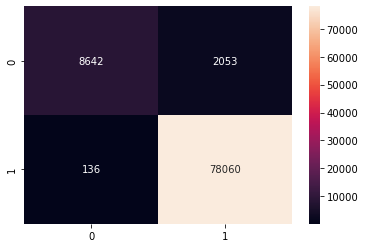

In [48]:
sns.heatmap(confusion_matrix(test_labels,rfc_pred),annot=True,fmt="d")

In [49]:
TN = cm_rfc[0,0]
FP = cm_rfc[0,1]
FN = cm_rfc[1,0]
TP = cm_rfc[1,1]

In [50]:
TN, FP, FN, TP

(8642, 2053, 136, 78060)

In [51]:
cm_rfc = confusion_matrix(test_labels, rfc_pred)

print('TN - True Negative {}'.format(cm_rfc[0,0])) 
print('FP - False Positive {}'.format(cm_rfc[0,1]))
print('FN - False Negative {}'.format(cm_rfc[1,0]))
print('TP - True Positive {}'.format(cm_rfc[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_rfc[0,0],cm_rfc[1,1]]),np.sum(cm_rfc))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm_rfc[0,1],cm_rfc[1,0]]),np.sum(cm_rfc))*100))

TN - True Negative 8642
FP - False Positive 2053
FN - False Negative 136
TP - True Positive 78060
Accuracy Rate: 97.53743348595471
Misclassification Rate: 2.4625665140452915


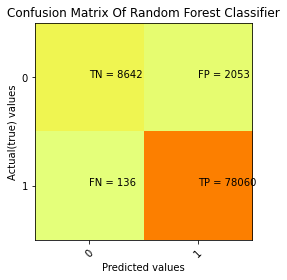

In [52]:
plt.clf()
plt.imshow(cm_rfc, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['0','1']
plt.title('Confusion Matrix Of Random Forest Classifier')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN' , 'FP'], ['FN' , 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_rfc[i][j]))

In [53]:
pd.crosstab(test_labels, rfc_pred, margins=False)

col_0,0,1
loan_status,,
0,8642,2053
1,136,78060


In [54]:
pd.crosstab(test_labels, rfc_pred, margins=True)

col_0,0,1,All
loan_status,,,
0,8642,2053,10695
1,136,78060,78196
All,8778,80113,88891


In [55]:
pd.crosstab(test_labels, rfc_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,8642,2053,10695
1,136,78060,78196
All,8778,80113,88891


In [56]:
TP,FP

(78060, 2053)

In [57]:
Precision = TP/(TP+FP)
Precision

0.9743736971527717

In [58]:
# print precision score

precision_Score_rfc = TP / float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score_rfc))

Precision score: 97.4374


In [59]:
print("precision Score is:", precision_score (test_labels, rfc_pred)*100)
print("Mircro Average precision Score is:", precision_score(test_labels, rfc_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score (test_labels, rfc_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (test_labels, rfc_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score(test_labels, rfc_pred, average=None)*100)

precision Score is: 97.43736971527717
Mircro Average precision Score is: 97.53743348595471
Marcro Average precision Score is: 97.94402092507993
Weighted Average precision Score is: 97.55928610026193
precision Score on Non weighted score is: [98.45067213 97.43736972]


In [60]:
print('Classification Report of Random Forest Classifier: \n',classification_report(test_labels, rfc_pred, digits=4))

Classification Report of Random Forest Classifier: 
               precision    recall  f1-score   support

           0     0.9845    0.8080    0.8876     10695
           1     0.9744    0.9983    0.9862     78196

    accuracy                         0.9754     88891
   macro avg     0.9794    0.9032    0.9369     88891
weighted avg     0.9756    0.9754    0.9743     88891



In [61]:
recall_score_rfc = TP / float(TP + FN)*100
print('recall score', recall_score_rfc)

recall score 99.82607806025884


In [62]:
TP,FN

(78060, 136)

In [63]:
print('Recall or Sensitivity score :',recall_score(test_labels,rfc_pred)*100)

Recall or Sensitivity score : 99.82607806025884


In [64]:
print("Mircro Average Recall Score is", recall_score(test_labels, rfc_pred, average='micro')*100)
print("Marcro Average Recall Score is", recall_score(test_labels, rfc_pred, average='macro')*100)
print("Weighted Average Recall Score is:", recall_score(test_labels, rfc_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score(test_labels, rfc_pred, average=None)*100)

Mircro Average Recall Score is 97.53743348595471
Marcro Average Recall Score is 90.31509606612755
Weighted Average Recall Score is: 97.53743348595471
Recall Score on Non weighted score is: [80.80411407 99.82607806]


In [65]:
print('Classification Report of Random Forest Classifier: \n',classification_report(test_labels,rfc_pred,digits=4))

Classification Report of Random Forest Classifier: 
               precision    recall  f1-score   support

           0     0.9845    0.8080    0.8876     10695
           1     0.9744    0.9983    0.9862     78196

    accuracy                         0.9754     88891
   macro avg     0.9794    0.9032    0.9369     88891
weighted avg     0.9756    0.9754    0.9743     88891



In [66]:
FPR_rfc = FP / float(FP + TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR_rfc))

False Positive Rate: 19.1959


In [67]:
FP, TN

(2053, 8642)

In [68]:
specificity_rfc = TN / (TN + FP)*100
print('Specificity: {0:0.4f}'.format(specificity_rfc))

Specificity: 80.8041


In [69]:
f1_score_rfc = f1_score(test_labels, rfc_pred)*100
print("f1_score of macro :",f1_score_rfc)

f1_score of macro : 98.61726117908647


In [70]:
print("Mircro Average F1 Score is:", f1_score(test_labels, rfc_pred, average='micro')*100)
print("Marcro Average F1 Score is:", f1_score(test_labels, rfc_pred, average='macro')*100)
print("Weighted Average F1 Score is:", f1_score(test_labels, rfc_pred, average='weighted')*100)
print("F1 Score on Non weighted score is:", f1_score(test_labels, rfc_pred, average=None)*100)

Mircro Average F1 Score is: 97.53743348595471
Marcro Average F1 Score is: 93.68802770349589
Weighted Average F1 Score is: 97.43113092919748
F1 Score on Non weighted score is: [88.75879423 98.61726118]


In [71]:
print('Classification Report of Random Forest Classifier: \n', classification_report(test_labels,rfc_pred,digits=4))

Classification Report of Random Forest Classifier: 
               precision    recall  f1-score   support

           0     0.9845    0.8080    0.8876     10695
           1     0.9744    0.9983    0.9862     78196

    accuracy                         0.9754     88891
   macro avg     0.9794    0.9032    0.9369     88891
weighted avg     0.9756    0.9754    0.9743     88891



In [72]:
# Area Under Curve 
auc_rfc = roc_auc_score(test_labels, rfc_pred)
print("ROC AUC SCORE of Artificial Neural Network (ANN) is", auc_rfc)

ROC AUC SCORE of Artificial Neural Network (ANN) is 0.9031509606612755


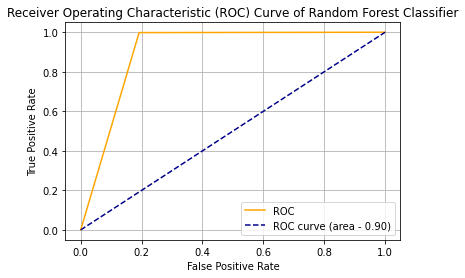

In [73]:
fpr, tpr, thresholds = roc_curve(test_labels, rfc_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area - %0.2f)' % auc_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest Classifier')
plt.legend()
plt.grid()
plt.show()